INSTITUTO TECNOLOGICO Y DE ESTUDIOS SUPERIORES DE MONTERREY

 CAMPUS PUEBLA

ANALITICA DE DATOS Y HERRAMIENTAS DE INTELIGENCIA ARTIFICIAL II

EXTRACCIÓN DE CARACTERÍSTICAS

ALUMNO:

Ángel Roberto González Angulo | A01735880

PROFESORES:

Alfredo García Suárez

GRUPO:
501


FECHA DE ENTREGA:
30/09/2024

# Librerías y lectura de datos

In [142]:
# Instalamos la librería para análisis de variables categóricas
# %pip install funpymodeling

In [143]:
# Importar las librerías
import pandas as pd
import numpy as np
from funpymodeling.exploratory import freq_tbl
import matplotlib.pyplot as plt

In [144]:
df = pd.read_excel("OttawaSturges.xlsx")
df.drop("Unnamed: 0", axis = 1, inplace = True)
df.head(6)

,last_scraped,source,host_name,host_response_time,host_verifications,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,...,hostResponseCat,hostAcceptanceCat,hostVerifCat,bedsCategory,reviewsMonthCat,reviewScoresCat,reviewLocationCat,reviewRatingCat,reviewCleanCat,reviewCommunicationCat
0,2024-06-21,city scrape,Glenn,within an hour,"['email', 'phone']",Kitchissippi,Entire rental unit,Entire home/apt,1 bath,"[""Kitchen"", ""Shampoo"", ""Coffee maker"", ""Smoke ...",...,(91 - 100%) Tasa de respuesta perfecta,(92 - 100%) Excelente,(2) Verificación moderada,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
1,2024-06-21,city scrape,Daniel,within a day,"['email', 'phone']",Rideau-Goulbourn,Entire home,Entire home/apt,1 bath,"[""Extra pillows and blankets"", ""Kitchen"", ""Sha...",...,(91 - 100%) Tasa de respuesta perfecta,(92 - 100%) Excelente,(2) Verificación moderada,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
2,2024-06-21,city scrape,Ela,within an hour,"['email', 'phone']",Capital,Private room in home,Private room,1 private bath,"[""Free washer \u2013 In building"", ""Extra pill...",...,(91 - 100%) Tasa de respuesta perfecta,(92 - 100%) Excelente,(2) Verificación moderada,(0 - 1) Una cama,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
3,2024-06-21,city scrape,William,within an hour,['phone'],Gloucester-South Nepean,Entire home,Entire home/apt,1 bath,"[""Kitchen"", ""Shampoo"", ""Host greets you"", ""Smo...",...,(91 - 100%) Tasa de respuesta perfecta,(74 - 82%) Muy bueno,(0 - 1) Verificación básica,(3 - 5) Camas múltiples,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
4,2024-06-21,city scrape,Greg And Valerie,within an hour,"['email', 'phone', 'work_email']",Kitchissippi,Entire home,Entire home/apt,1 bath,"[""Extra pillows and blankets"", ""Self check-in""...",...,(91 - 100%) Tasa de respuesta perfecta,(83 - 91%) Alto,(3) Verificación completa,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
5,2024-06-21,city scrape,Greg And Valerie,within an hour,"['email', 'phone', 'work_email']",Kitchissippi,Entire townhouse,Entire home/apt,1 bath,"[""Self check-in"", ""Free driveway parking on pr...",...,(91 - 100%) Tasa de respuesta perfecta,(83 - 91%) Alto,(3) Verificación completa,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2862 entries, 0 to 2861
Data columns (total 74 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   last_scraped                    2862 non-null   object 
 1   source                          2862 non-null   object 
 2   host_name                       2862 non-null   object 
 3   host_response_time              2862 non-null   object 
 4   host_verifications              2862 non-null   object 
 5   neighbourhood_cleansed          2862 non-null   object 
 6   property_type                   2862 non-null   object 
 7   room_type                       2862 non-null   object 
 8   bathrooms_text                  2862 non-null   object 
 9   amenities                       2862 non-null   object 
 10  calendar_last_scraped           2862 non-null   object 
 11  host_id                         2862 non-null   int64  
 12  host_since                      28

In [146]:
# Revisamos el nombre de las columnas
df.columns

Index(['last_scraped', 'source', 'host_name', 'host_response_time',
       'host_verifications', 'neighbourhood_cleansed', 'property_type',
       'room_type', 'bathrooms_text', 'amenities', 'calendar_last_scraped',
       'host_id', 'host_since', 'host_is_superhost', 'host_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'latitude',
       'longitude', 'bathrooms', 'bedrooms', 'availability_30',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_accuracy', 'review_scores_checkin', 'instant_bookable',
       'calculated_host_listings_count', 'price', 'room_type_num',
       'neighbourhood_cleansed_num', 'bathroom_text_clean',
       'neighbourhood_Category', 'amenities_num', 'host_total_listings_count',
       'accommodates', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
       'availability_365', 'number_of_reviews', 'host_years', 'priceMex',
       'host_response_rate', 'host_acceptance_rate', 'host_verifications_num',
     

In [147]:
# Separamos el dataframe para solo trabajar con la Extracción de Características (20 diferentes)
df1 = df[["amenitiesCat","hostTotalListingsCat","accommodatesCat","minimumNightsCategory","maximumNightsCategory","availabilityYearCat","reviewsNumCat","hostYearsCat",
          "priceMexCat","hostResponseCat","hostAcceptanceCat","hostVerifCat","bedsCategory","reviewsMonthCat","reviewScoresCat","reviewLocationCat","reviewRatingCat",
          "reviewCleanCat","reviewCommunicationCat","host_response_time","bathroom_text_clean","neighbourhood_Category","room_type"]]

In [148]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2862 entries, 0 to 2861
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   amenitiesCat            2862 non-null   object
 1   hostTotalListingsCat    2862 non-null   object
 2   accommodatesCat         2862 non-null   object
 3   minimumNightsCategory   2862 non-null   object
 4   maximumNightsCategory   2862 non-null   object
 5   availabilityYearCat     2862 non-null   object
 6   reviewsNumCat           2862 non-null   object
 7   hostYearsCat            2862 non-null   object
 8   priceMexCat             2862 non-null   object
 9   hostResponseCat         2862 non-null   object
 10  hostAcceptanceCat       2862 non-null   object
 11  hostVerifCat            2862 non-null   object
 12  bedsCategory            2862 non-null   object
 13  reviewsMonthCat         2862 non-null   object
 14  reviewScoresCat         2862 non-null   object
 15  revi

# Analísis Univariado de variables catégoricas

In [149]:
# Obtener análisis univariado
table1 = freq_tbl(df1["amenitiesCat"])
table1

,amenitiesCat,frequency,percentage,cumulative_perc
0,(44 - 50) Superior,537,0.187631,0.187631
1,(37 - 43) Enriquecido,470,0.164221,0.351852
2,(30 - 36) Amplio,426,0.148847,0.500699
3,(51 - 57) Extendido,326,0.113906,0.614605
4,(23 - 29) Completo,291,0.101677,0.716282
5,(15 - 22) Estándar,263,0.091894,0.808176
6,(8 - 14) Limitado,223,0.077918,0.886094
7,(58 - 64) Excepcional,176,0.061495,0.947589
8,(65 - 72) Muy completo,80,0.027952,0.975542
9,(0 - 7) Básico,47,0.016422,0.991964


In [150]:
# Obtener análisis univariado
table2 = freq_tbl(df1["hostTotalListingsCat"])
table2

,hostTotalListingsCat,frequency,percentage,cumulative_perc
0,(1 - 14) Pocos Listados,2531,0.884347,0.884347
1,(14 - 27) Principiante,159,0.055556,0.939902
2,(27 - 40) En crecimiento,83,0.029001,0.968903
3,(40 - 53) Intermedio,33,0.011530,0.980433
4,(131 - 144) Experto en hospedaje,24,0.008386,0.988819
5,(66 - 79) Experimentado,22,0.007687,0.996506
6,(79 - 92) Establecido,4,0.001398,0.997904
7,(105 - 118) Operador experimentado,4,0.001398,0.999301
8,(53 - 66) Avanzado,2,0.000699,1.000000


In [151]:
# Obtener análisis univariado
table3 = freq_tbl(df1["accommodatesCat"])
table3

,accommodatesCat,frequency,percentage,cumulative_perc
0,(1 - 2) Solo / Pareja,1494,0.522013,0.522013
1,(3 - 4) Familiar pequeño,688,0.240391,0.762404
2,(5 - 6) Familiar mediano,405,0.141509,0.903913
3,(7 - 8) Familiar grande,191,0.066737,0.970650
4,(9 - 10) Grupo,82,0.028651,0.999301
5,(11 - 12) Grupo grande,2,0.000699,1.000000


In [152]:
# Obtener análisis univariado
table4 = freq_tbl(df1["minimumNightsCategory"])
table4

,minimumNightsCategory,frequency,percentage,cumulative_perc
0,(1 - 9) Muy corto plazo,1571,0.548917,0.548917
1,(25 - 33) Plazo moderado,1181,0.412648,0.961565
2,(9 - 17) Corto plazo,48,0.016771,0.978337
3,(17 - 25) Plazo intermedio,18,0.006289,0.984626
4,(82 - 90) Temporada completa,15,0.005241,0.989867
5,(58 - 66) Prolongado,15,0.005241,0.995108
6,(41 - 50) Largo plazo,8,0.002795,0.997904
7,(50 - 58) Muy largo plazo,2,0.000699,0.998602
8,(33 - 41) Plazo extendido,2,0.000699,0.999301
9,(74 - 82) Larga temporada,2,0.000699,1.000000


In [153]:
# Obtener análisis univariado
table5 = freq_tbl(df1["maximumNightsCategory"])
table5

,maximumNightsCategory,frequency,percentage,cumulative_perc
0,(1023 - 1125) Máximo,1239,0.432914,0.432914
1,(308 - 410) Plazo extendido,858,0.299790,0.732704
2,(1 - 103) Poco tiempo,536,0.187282,0.919986
3,(103 - 205) Corto plazo,132,0.046122,0.966108
4,(716 - 818) Amplio,50,0.017470,0.983578
5,(205 - 308) Plazo moderado,23,0.008036,0.991614
6,(410 - 512) Largo plazo,8,0.002795,0.994410
7,(614 - 716) Extensivo,7,0.002446,0.996855
8,(512 - 614) Prolongado,4,0.001398,0.998253
9,(921 - 1023) Anual,3,0.001048,0.999301


In [154]:
# Obtener análisis univariado
table6 = freq_tbl(df1["availabilityYearCat"])
table6

,availabilityYearCat,frequency,percentage,cumulative_perc
0,(335 - 365) Año Completo,451,0.157582,0.157582
1,(243 - 274) Casi total disponibilidad,369,0.128931,0.286513
2,(61 - 91) Disponibilidad sencilla,338,0.118099,0.404612
3,(152 - 182) Disponibilidad alta,246,0.085954,0.490566
4,(0 - 30) Muy baja disponibilidad,243,0.084906,0.575472
5,(304 - 335) Total disponibilidad,228,0.079665,0.655136
6,(30 - 61) Baja disponibilidad,197,0.068833,0.723969
7,(274 - 304) Disponibilidad casi completa,191,0.066737,0.790706
8,(213 - 243) Extensa disponibilidad,167,0.058351,0.849057
9,(122 - 152) Disponibilidad regular,155,0.054158,0.903215


In [155]:
# Obtener análisis univariado
table7 = freq_tbl(df1["reviewsNumCat"])
table7

,reviewsNumCat,frequency,percentage,cumulative_perc
0,(0 - 25) Muy pocas reseñas,1763,0.616003,0.616003
1,(25 - 50) Pocas reseñas,445,0.155486,0.771488
2,(50 - 75) Reseñas limitadas,198,0.069182,0.840671
3,(75 - 100) Reseñas moderadas,166,0.058001,0.898672
4,(100 - 125) Buen número de reseñas,98,0.034242,0.932914
5,(125 - 150) Reseñas sólidas,63,0.022013,0.954927
6,(150 - 175) Muchas reseñas,50,0.017470,0.972397
7,(200 - 225) Muy comentado,26,0.009085,0.981481
8,(175 - 200) Con mucho flujo,23,0.008036,0.989518
9,(225 - 250) Popular,15,0.005241,0.994759


In [156]:
# Obtener análisis univariado
table8 = freq_tbl(df1["hostYearsCat"])
table8

,hostYearsCat,frequency,percentage,cumulative_perc
0,Intermedio (4-7 años),1173,0.409853,0.409853
1,Principiante (0-3 años),968,0.338225,0.748078
2,Profesional (8-11 años),696,0.243187,0.991265
3,Experimentado (12-16 años),25,0.008735,1.000000


In [157]:
# Obtener análisis univariado
table9 = freq_tbl(df1["priceMexCat"])
table9

,priceMexCat,frequency,percentage,cumulative_perc
0,"(1,184 - 2,047) Bajo precio",1044,0.364780,0.364780
1,"(320 - 1,184) Muy bajo precio",859,0.300140,0.664920
2,"(2,047 - 2,911) Precio moderado",389,0.135919,0.800839
3,"(2,911 - 3,774) Precio considerable",264,0.092243,0.893082
4,"(3,774 - 4,638) Precio alto",131,0.045772,0.938854
5,"(4,638 - 5,501) Precio elevado",70,0.024458,0.963312
6,"(5,501 - 6,365) Alto precio",43,0.015024,0.978337
7,"(6,365 - 7,228) Muy alto precio",26,0.009085,0.987421
8,"(8,092 - 8,955) Precio de lujo",18,0.006289,0.993711
9,"(7,228 - 8,092) Precio premium",13,0.004542,0.998253


In [158]:
# Obtener análisis univariado
table10 = freq_tbl(df1["hostResponseCat"])
table10

,hostResponseCat,frequency,percentage,cumulative_perc
0,(91 - 100%) Tasa de respuesta perfecta,2503,0.874563,0.874563
1,(82 - 91%) Tasa de respuesta sobresaliente,176,0.061495,0.936059
2,(0 - 9%) Muy baja tasa de respuesta,55,0.019217,0.955276
3,(73 - 82%) Excelente tasa de respuesta,44,0.015374,0.970650
4,(64 - 73%) Muy buena tasa de respuesta,31,0.010832,0.981481
5,(45 - 55%) Tasa de respuesta buena,20,0.006988,0.988470
6,(9 - 18%) Baja tasa de respuesta,19,0.006639,0.995108
7,(18 - 27%) Tasa de respuesta limitada,7,0.002446,0.997554
8,(27 - 36%) Tasa de respuesta moderada,4,0.001398,0.998952
9,(55 - 64%) Alta tasa de respuesta,2,0.000699,0.999651


In [159]:
# Obtener análisis univariado
table11 = freq_tbl(df1["hostAcceptanceCat"])
table11

,hostAcceptanceCat,frequency,percentage,cumulative_perc
0,(92 - 100%) Excelente,1701,0.594340,0.594340
1,(83 - 91%) Alto,655,0.228861,0.823201
2,(74 - 82%) Muy bueno,155,0.054158,0.877358
3,(0 - 9%) Muy Malo,102,0.035639,0.912998
4,(65 - 73%) Bueno,86,0.030049,0.943047
5,(46 - 55%) Mejorable,57,0.019916,0.962963
6,(56 - 64%) Aceptable,46,0.016073,0.979036
7,(28 - 36%) Bajo,25,0.008735,0.987771
8,(19 - 27%) Muy Bajo,17,0.005940,0.993711
9,(37 - 45%) Medio,14,0.004892,0.998602


In [160]:
# Obtener análisis univariado
table12 = freq_tbl(df1["hostVerifCat"])
table12

,hostVerifCat,frequency,percentage,cumulative_perc
0,(2) Verificación moderada,2256,0.788260,0.788260
1,(3) Verificación completa,352,0.122991,0.911251
2,(0 - 1) Verificación básica,254,0.088749,1.000000


In [161]:
# Obtener análisis univariado
table13 = freq_tbl(df1["bedsCategory"])
table13

,bedsCategory,frequency,percentage,cumulative_perc
0,(0 - 1) Una cama,1748,0.610762,0.610762
1,(2) Pocas camas,818,0.285814,0.896576
2,(3 - 5) Camas múltiples,250,0.087352,0.983927
3,(5 - 6) Muchas camas,46,0.016073,1.000000


In [162]:
# Obtener análisis univariado
table14 = freq_tbl(df1["reviewsMonthCat"])
table14

,reviewsMonthCat,frequency,percentage,cumulative_perc
0,(1) Reseña mensual mínima,1215,0.424528,0.424528
1,(0) Sin reseñas,1118,0.390636,0.815164
2,(2 - 5) Reseñas mensuales moderadas,329,0.114955,0.930119
3,(5 - 7) Buen número de reseñas mensuales,138,0.048218,0.978337
4,(7 - 10) Alta frecuencia de reseñas,62,0.021663,1.000000


In [163]:
# Obtener análisis univariado
table15 = freq_tbl(df1["reviewScoresCat"])
table15

,reviewScoresCat,frequency,percentage,cumulative_perc
0,(5) Muy satisfecho,2508,0.876310,0.876310
1,(4) Satisfecho,312,0.109015,0.985325
2,(3) Neutral,26,0.009085,0.994410
3,(1 - 2) Insatisfecho,16,0.005590,1.000000


In [164]:
# Obtener análisis univariado
table16 = freq_tbl(df1["reviewLocationCat"])
table16

,reviewLocationCat,frequency,percentage,cumulative_perc
0,(5) Muy satisfecho,2643,0.923480,0.923480
1,(4) Satisfecho,200,0.069881,0.993361
2,(3) Neutral,13,0.004542,0.997904
3,(1 - 2) Insatisfecho,6,0.002096,1.000000


In [165]:
# Obtener análisis univariado
table17 = freq_tbl(df1["reviewRatingCat"])
table17

,reviewRatingCat,frequency,percentage,cumulative_perc
0,(5) Muy satisfecho,2605,0.910203,0.910203
1,(4) Satisfecho,225,0.078616,0.988819
2,(3) Neutral,22,0.007687,0.996506
3,(1 - 2) Insatisfecho,10,0.003494,1.000000


In [166]:
# Obtener análisis univariado
table18 = freq_tbl(df1["reviewCleanCat"])
table18

,reviewCleanCat,frequency,percentage,cumulative_perc
0,(5) Muy satisfecho,2560,0.894479,0.894479
1,(4) Satisfecho,270,0.094340,0.988819
2,(3) Neutral,17,0.005940,0.994759
3,(1 - 2) Insatisfecho,15,0.005241,1.000000


In [167]:
# Obtener análisis univariado
table19 = freq_tbl(df1["reviewCommunicationCat"])
table19

,reviewCommunicationCat,frequency,percentage,cumulative_perc
0,(5) Muy satisfecho,2735,0.955625,0.955625
1,(4) Satisfecho,102,0.035639,0.991265
2,(3) Neutral,14,0.004892,0.996157
3,(1 - 2) Insatisfecho,11,0.003843,1.000000


In [168]:
# Obtener análisis univariado
table20 = freq_tbl(df1["host_response_time"])
table20

,host_response_time,frequency,percentage,cumulative_perc
0,within an hour,2249,0.785814,0.785814
1,within a few hours,333,0.116352,0.902166
2,within a day,194,0.067785,0.969951
3,a few days or more,86,0.030049,1.000000


In [169]:
# Obtener análisis univariado
table21 = freq_tbl(df1["bathroom_text_clean"])
table21

,bathroom_text_clean,frequency,percentage,cumulative_perc
0,bath,2131,0.744584,0.744584
1,shared bath,484,0.169113,0.913697
2,private bath,241,0.084207,0.997904
3,Half-bath,3,0.001048,0.998952
4,Private half-bath,2,0.000699,0.999651
5,Shared half-bath,1,0.000349,1.000000


In [170]:
# Obtener análisis univariado
table22 = freq_tbl(df1["neighbourhood_Category"])
table22

,neighbourhood_Category,frequency,percentage,cumulative_perc
0,Oeste,1294,0.452131,0.452131
1,Sur,842,0.294200,0.746331
2,Norte,410,0.143256,0.889588
3,Este,316,0.110412,1.000000


In [193]:
# Obtener análisis univariado
table23 = freq_tbl(df1["room_type"])
table23

,room_type,frequency,percentage,cumulative_perc
0,Entire home/apt,1759,0.614605,0.614605
1,Private room,1096,0.382949,0.997554
2,Shared room,7,0.002446,1.000000


# Gráficas

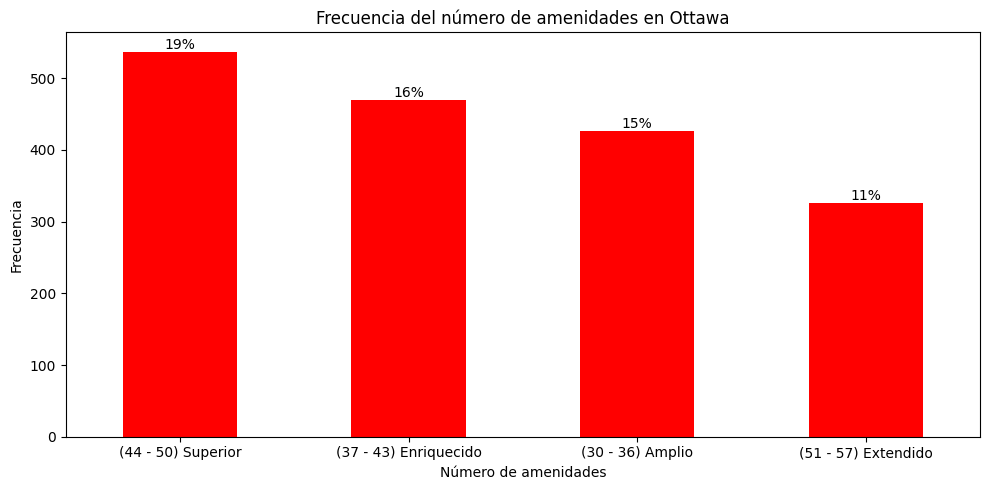

In [171]:
# Obtener el análisis univariado y ajustar el índice
table1 = freq_tbl(df1["amenitiesCat"]).drop('cumulative_perc', axis=1).head(4).set_index('amenitiesCat')

# Graficar mi frecuencia
ax = table1['frequency'].plot(kind='bar', figsize=(10, 5), color='red', title="Frecuencia del número de amenidades en Ottawa", legend=False)
plt.xlabel("Número de amenidades")
plt.ylabel("Frecuencia")

# Porcentajes
ax.bar_label(ax.containers[0], labels=[f'{p:.0%}' for p in table1['percentage']], label_type='edge', fontsize=10)

# Edición extra
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


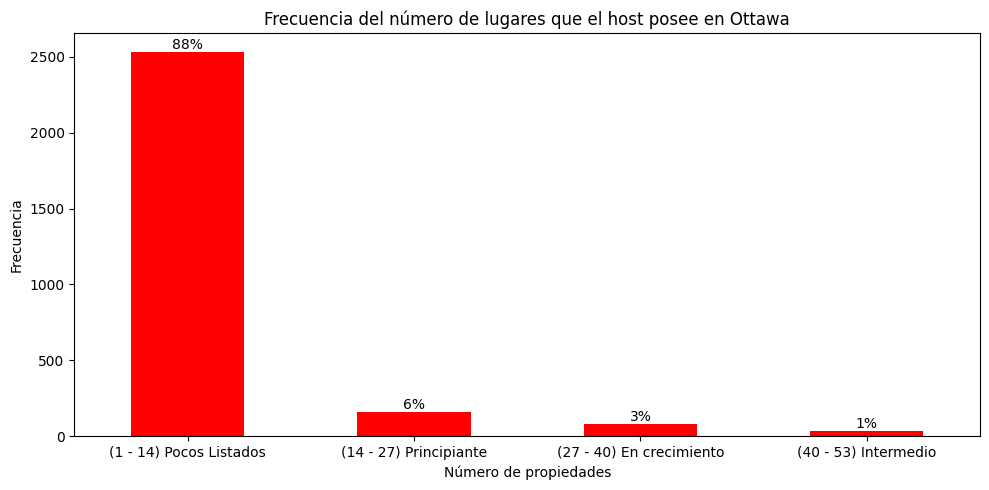

In [172]:
# Obtener el análisis univariado y ajustar el índice
table2 = freq_tbl(df1["hostTotalListingsCat"]).drop('cumulative_perc', axis=1).head(4).set_index('hostTotalListingsCat')

# Graficar mi frecuencia
ax = table2['frequency'].plot(kind='bar', figsize=(10, 5), color='red', title="Frecuencia del número de lugares que el host posee en Ottawa", legend=False)
plt.xlabel("Número de propiedades")
plt.ylabel("Frecuencia")

# Porcentajes
ax.bar_label(ax.containers[0], labels=[f'{p:.0%}' for p in table2['percentage']], label_type='edge', fontsize=10)

# Edición extra
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

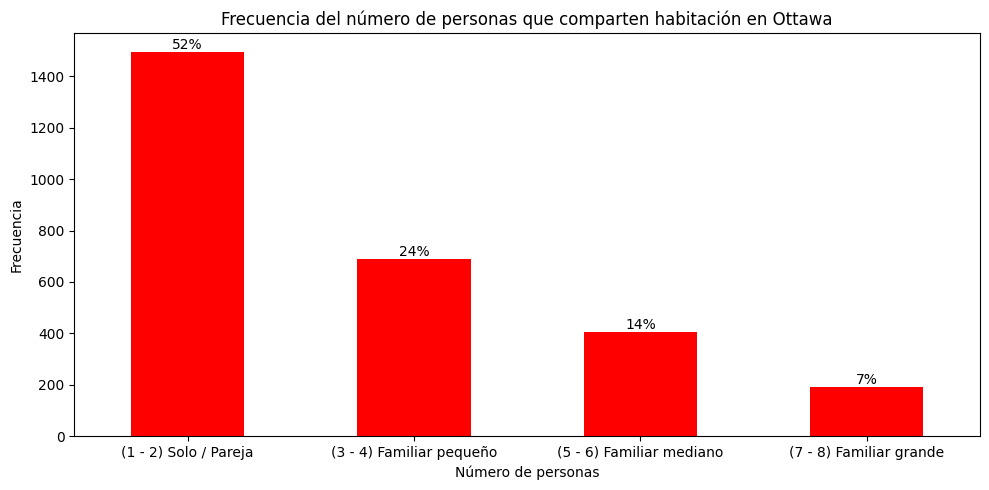

In [173]:
# Obtener el análisis univariado y ajustar el índice
table3 = freq_tbl(df1["accommodatesCat"]).drop('cumulative_perc', axis=1).head(4).set_index('accommodatesCat')

# Graficar mi frecuencia
ax = table3['frequency'].plot(kind='bar', figsize=(10, 5), color='red', title="Frecuencia del número de personas que comparten habitación en Ottawa", legend=False)
plt.xlabel("Número de personas")
plt.ylabel("Frecuencia")

# Porcentajes
ax.bar_label(ax.containers[0], labels=[f'{p:.0%}' for p in table3['percentage']], label_type='edge', fontsize=10)

# Edición extra
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

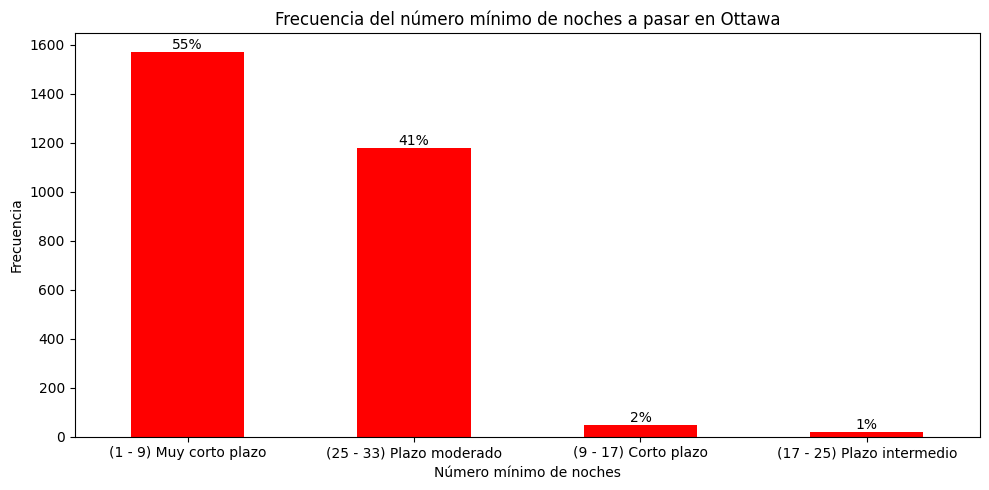

In [174]:
# Obtener el análisis univariado y ajustar el índice
table4 = freq_tbl(df1["minimumNightsCategory"]).drop('cumulative_perc', axis=1).head(4).set_index('minimumNightsCategory')

# Graficar mi frecuencia
ax = table4['frequency'].plot(kind='bar', figsize=(10, 5), color='red', title="Frecuencia del número mínimo de noches a pasar en Ottawa", legend=False)
plt.xlabel("Número mínimo de noches")
plt.ylabel("Frecuencia")

# Porcentajes
ax.bar_label(ax.containers[0], labels=[f'{p:.0%}' for p in table4['percentage']], label_type='edge', fontsize=10)

# Edición extra
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

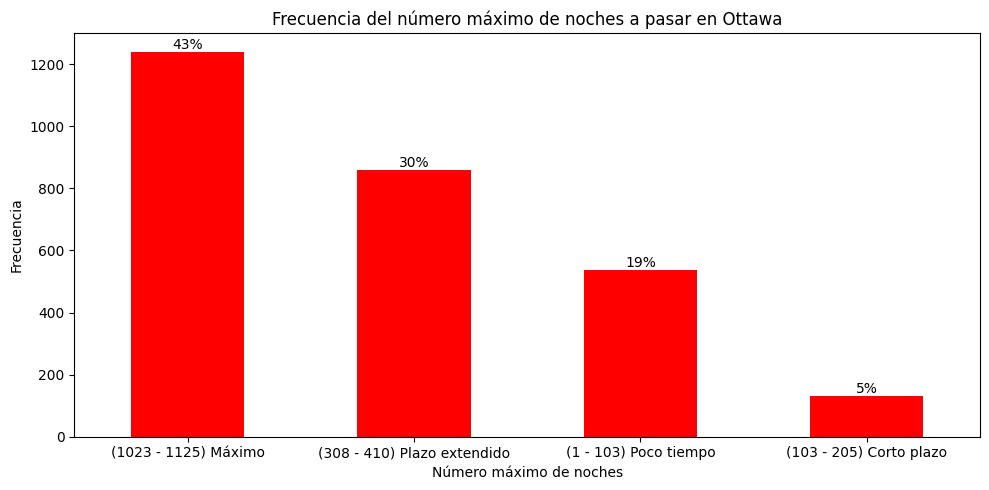

In [175]:
# Obtener el análisis univariado y ajustar el índice
table5 = freq_tbl(df1["maximumNightsCategory"]).drop('cumulative_perc', axis=1).head(4).set_index('maximumNightsCategory')

# Graficar mi frecuencia
ax = table5['frequency'].plot(kind='bar', figsize=(10, 5), color='red', title="Frecuencia del número máximo de noches a pasar en Ottawa", legend=False)
plt.xlabel("Número máximo de noches")
plt.ylabel("Frecuencia")

# Porcentajes
ax.bar_label(ax.containers[0], labels=[f'{p:.0%}' for p in table5['percentage']], label_type='edge', fontsize=10)

# Edición extra
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

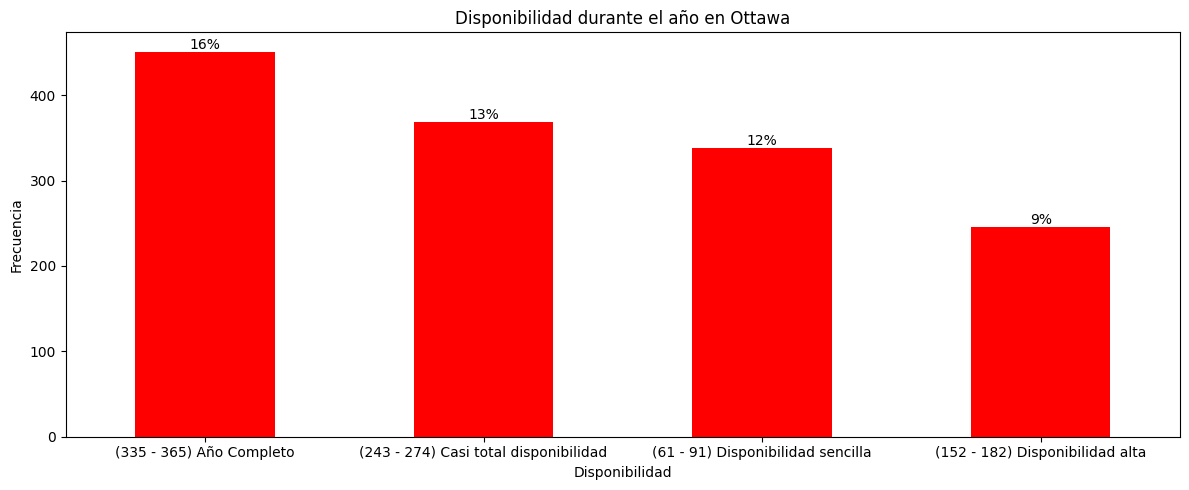

In [176]:
# Obtener el análisis univariado y ajustar el índice
table6 = freq_tbl(df1["availabilityYearCat"]).drop('cumulative_perc', axis=1).head(4).set_index('availabilityYearCat')

# Graficar mi frecuencia
ax = table6['frequency'].plot(kind='bar', figsize=(12, 5), color='red', title="Disponibilidad durante el año en Ottawa", legend=False)
plt.xlabel("Disponibilidad")
plt.ylabel("Frecuencia")

# Porcentajes
ax.bar_label(ax.containers[0], labels=[f'{p:.0%}' for p in table6['percentage']], label_type='edge', fontsize=10)

# Edición extra
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

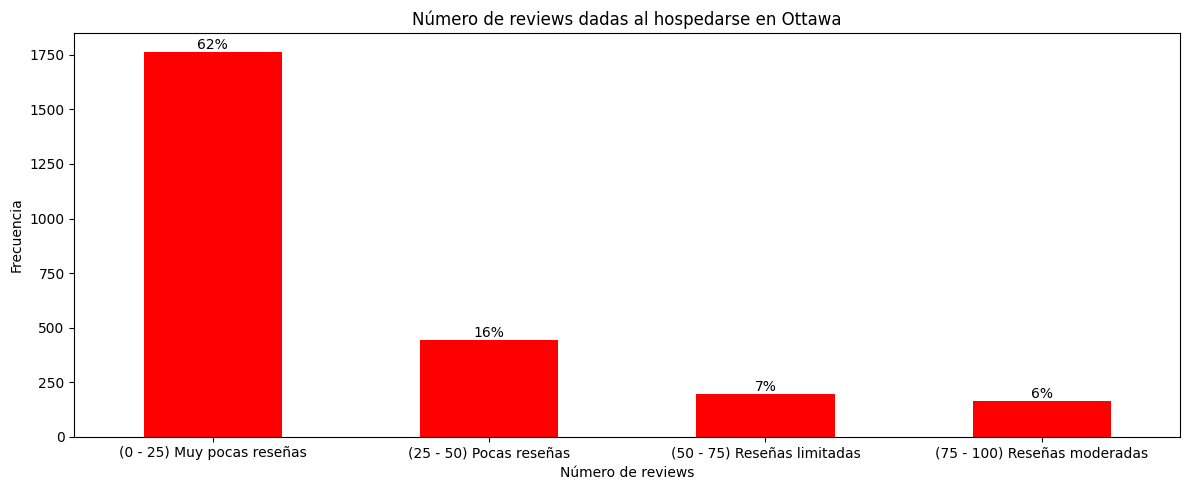

In [177]:
# Obtener el análisis univariado y ajustar el índice
table7 = freq_tbl(df1["reviewsNumCat"]).drop('cumulative_perc', axis=1).head(4).set_index('reviewsNumCat')

# Graficar mi frecuencia
ax = table7['frequency'].plot(kind='bar', figsize=(12, 5), color='red', title="Número de reviews dadas al hospedarse en Ottawa", legend=False)
plt.xlabel("Número de reviews")
plt.ylabel("Frecuencia")

# Porcentajes
ax.bar_label(ax.containers[0], labels=[f'{p:.0%}' for p in table7['percentage']], label_type='edge', fontsize=10)

# Edición extra
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

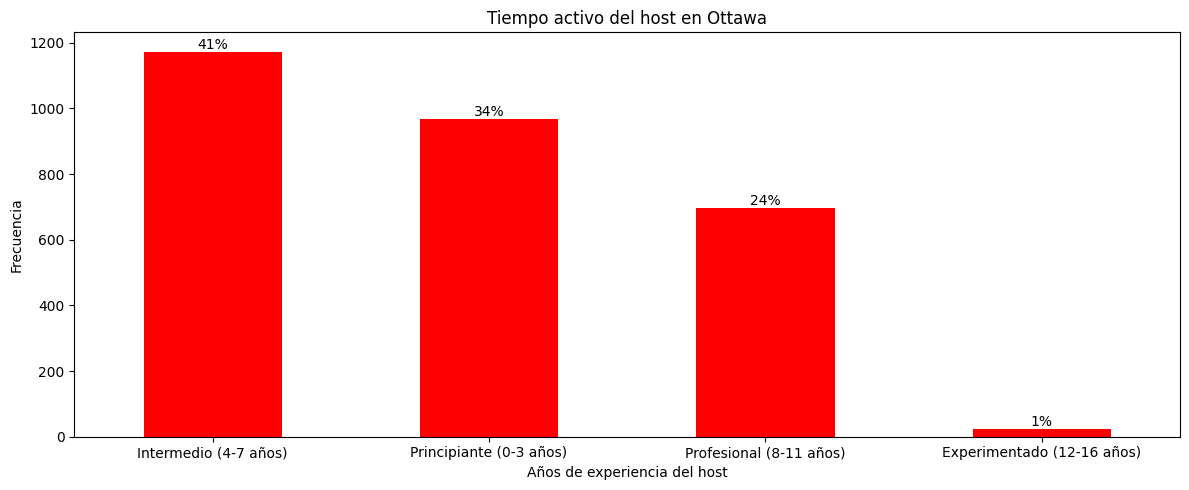

In [178]:
# Obtener el análisis univariado y ajustar el índice
table8 = freq_tbl(df1["hostYearsCat"]).drop('cumulative_perc', axis=1).head(4).set_index('hostYearsCat')

# Graficar mi frecuencia
ax = table8['frequency'].plot(kind='bar', figsize=(12, 5), color='red', title="Tiempo activo del host en Ottawa", legend=False)
plt.xlabel("Años de experiencia del host")
plt.ylabel("Frecuencia")

# Porcentajes
ax.bar_label(ax.containers[0], labels=[f'{p:.0%}' for p in table8['percentage']], label_type='edge', fontsize=10)

# Edición extra
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

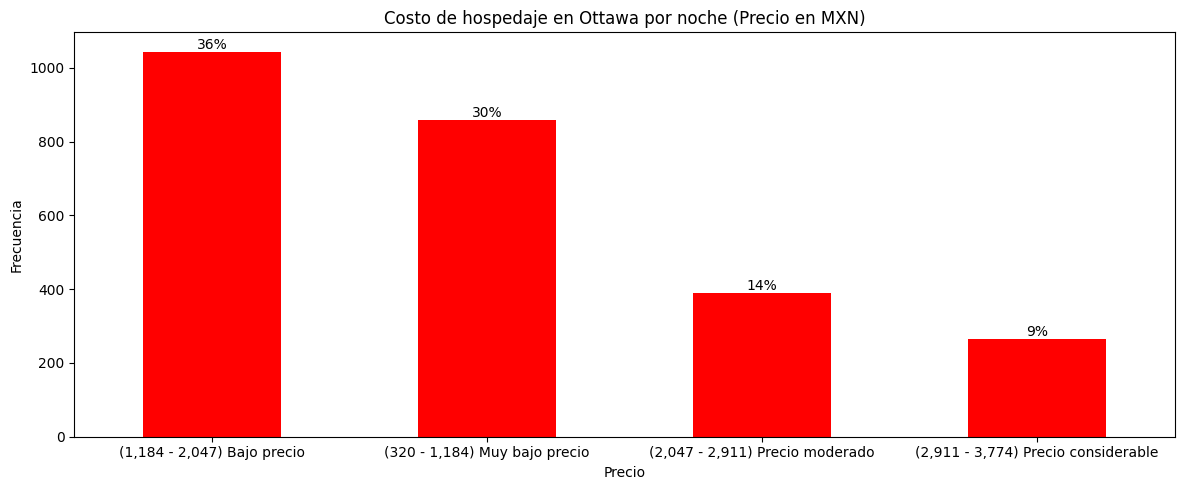

In [179]:
# Obtener el análisis univariado y ajustar el índice
table9 = freq_tbl(df1["priceMexCat"]).drop('cumulative_perc', axis=1).head(4).set_index('priceMexCat')

# Graficar mi frecuencia
ax = table9['frequency'].plot(kind='bar', figsize=(12, 5), color='red', title="Costo de hospedaje en Ottawa por noche (Precio en MXN)", legend=False)
plt.xlabel("Precio")
plt.ylabel("Frecuencia")

# Porcentajes
ax.bar_label(ax.containers[0], labels=[f'{p:.0%}' for p in table9['percentage']], label_type='edge', fontsize=10)

# Edición extra
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

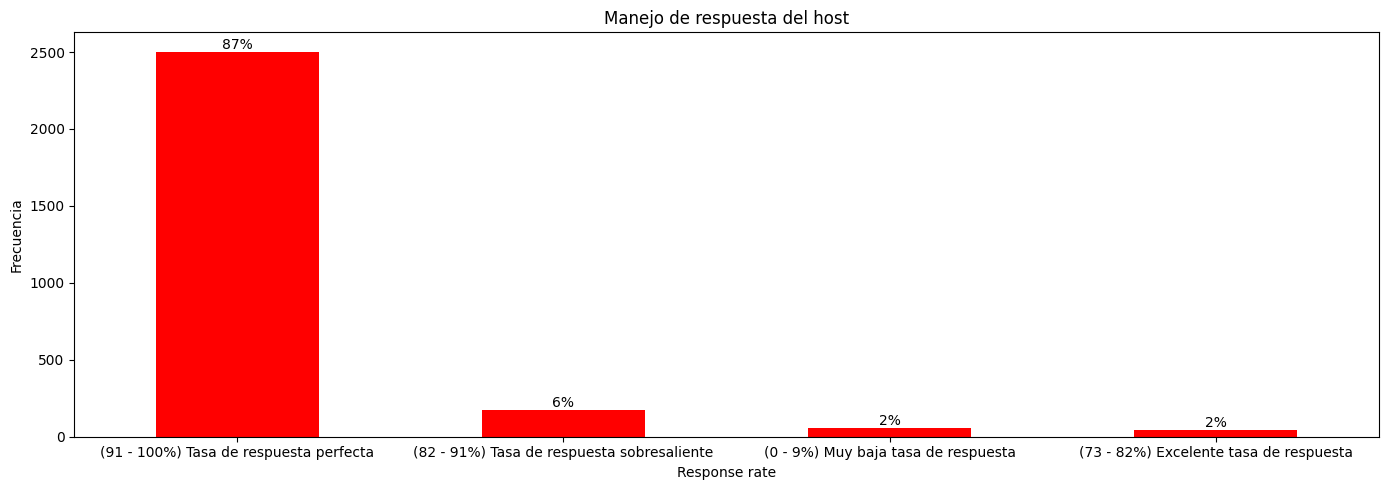

In [180]:
# Obtener el análisis univariado y ajustar el índice
table10 = freq_tbl(df1["hostResponseCat"]).drop('cumulative_perc', axis=1).head(4).set_index('hostResponseCat')

# Graficar mi frecuencia
ax = table10['frequency'].plot(kind='bar', figsize=(14, 5), color='red', title="Manejo de respuesta del host", legend=False)
plt.xlabel("Response rate")
plt.ylabel("Frecuencia")

# Porcentajes
ax.bar_label(ax.containers[0], labels=[f'{p:.0%}' for p in table10['percentage']], label_type='edge', fontsize=10)

# Edición extra
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

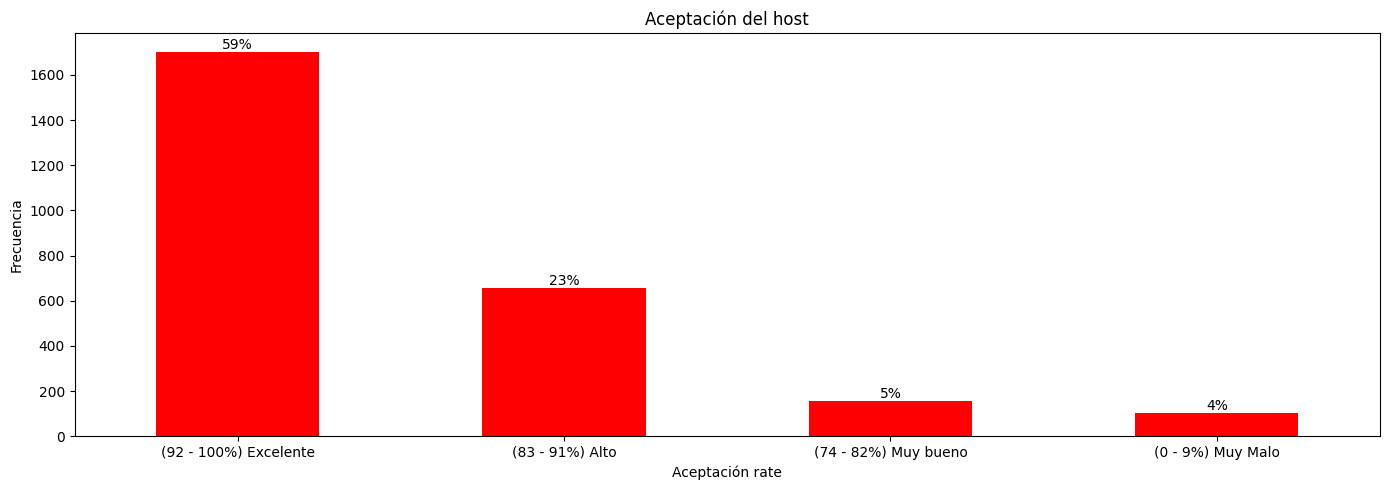

In [181]:
# Obtener el análisis univariado y ajustar el índice
table11 = freq_tbl(df1["hostAcceptanceCat"]).drop('cumulative_perc', axis=1).head(4).set_index('hostAcceptanceCat')

# Graficar mi frecuencia
ax = table11['frequency'].plot(kind='bar', figsize=(14, 5), color='red', title="Aceptación del host", legend=False)
plt.xlabel("Aceptación rate")
plt.ylabel("Frecuencia")

# Porcentajes
ax.bar_label(ax.containers[0], labels=[f'{p:.0%}' for p in table11['percentage']], label_type='edge', fontsize=10)

# Edición extra
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

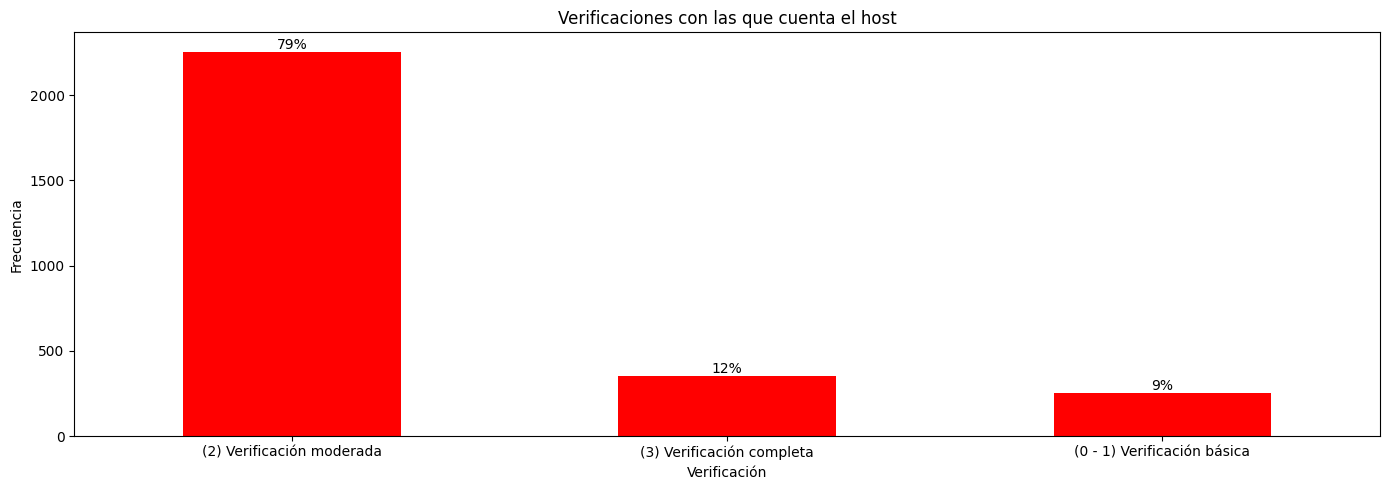

In [182]:
# Obtener el análisis univariado y ajustar el índice
table12 = freq_tbl(df1["hostVerifCat"]).drop('cumulative_perc', axis=1).set_index('hostVerifCat')

# Graficar mi frecuencia
ax = table12['frequency'].plot(kind='bar', figsize=(14, 5), color='red', title="Verificaciones con las que cuenta el host", legend=False)
plt.xlabel("Verificación")
plt.ylabel("Frecuencia")

# Porcentajes
ax.bar_label(ax.containers[0], labels=[f'{p:.0%}' for p in table12['percentage']], label_type='edge', fontsize=10)

# Edición extra
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

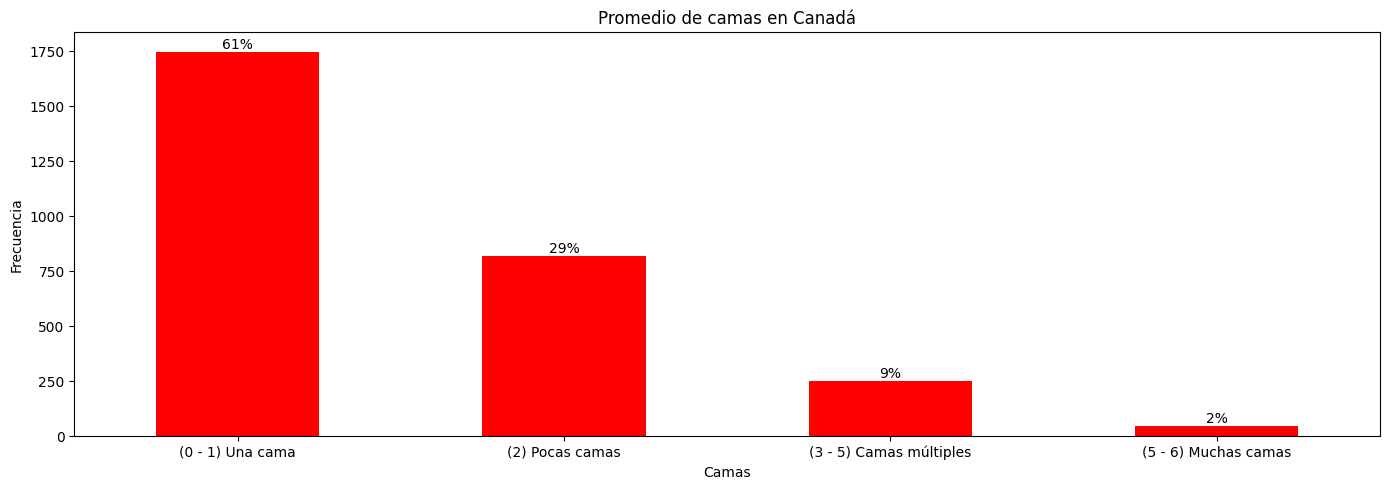

In [183]:
# Obtener el análisis univariado y ajustar el índice
table13 = freq_tbl(df1["bedsCategory"]).drop('cumulative_perc', axis=1).set_index('bedsCategory')

# Graficar mi frecuencia
ax = table13['frequency'].plot(kind='bar', figsize=(14, 5), color='red', title="Promedio de camas en Canadá", legend=False)
plt.xlabel("Camas")
plt.ylabel("Frecuencia")

# Porcentajes
ax.bar_label(ax.containers[0], labels=[f'{p:.0%}' for p in table13['percentage']], label_type='edge', fontsize=10)

# Edición extra
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

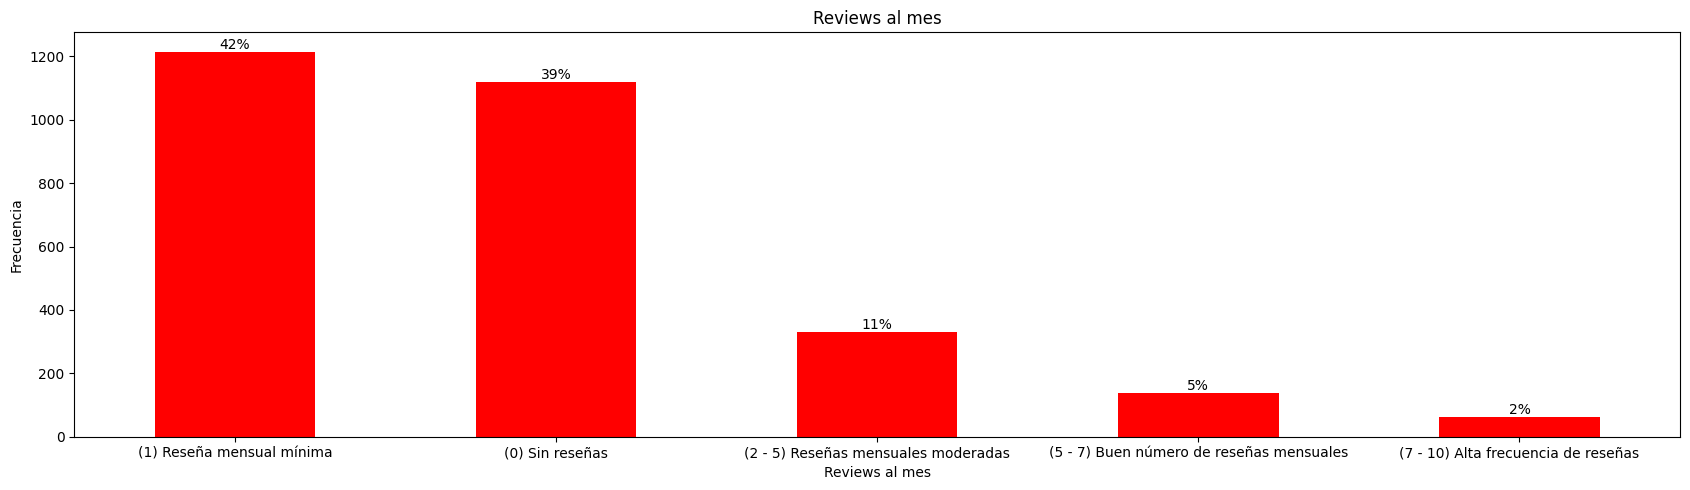

In [184]:
# Obtener el análisis univariado y ajustar el índice
table14 = freq_tbl(df1["reviewsMonthCat"]).drop('cumulative_perc', axis=1).set_index('reviewsMonthCat')

# Graficar mi frecuencia
ax = table14['frequency'].plot(kind='bar', figsize=(17, 5), color='red', title="Reviews al mes", legend=False)
plt.xlabel("Reviews al mes")
plt.ylabel("Frecuencia")

# Porcentajes
ax.bar_label(ax.containers[0], labels=[f'{p:.0%}' for p in table14['percentage']], label_type='edge', fontsize=10)

# Edición extra
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

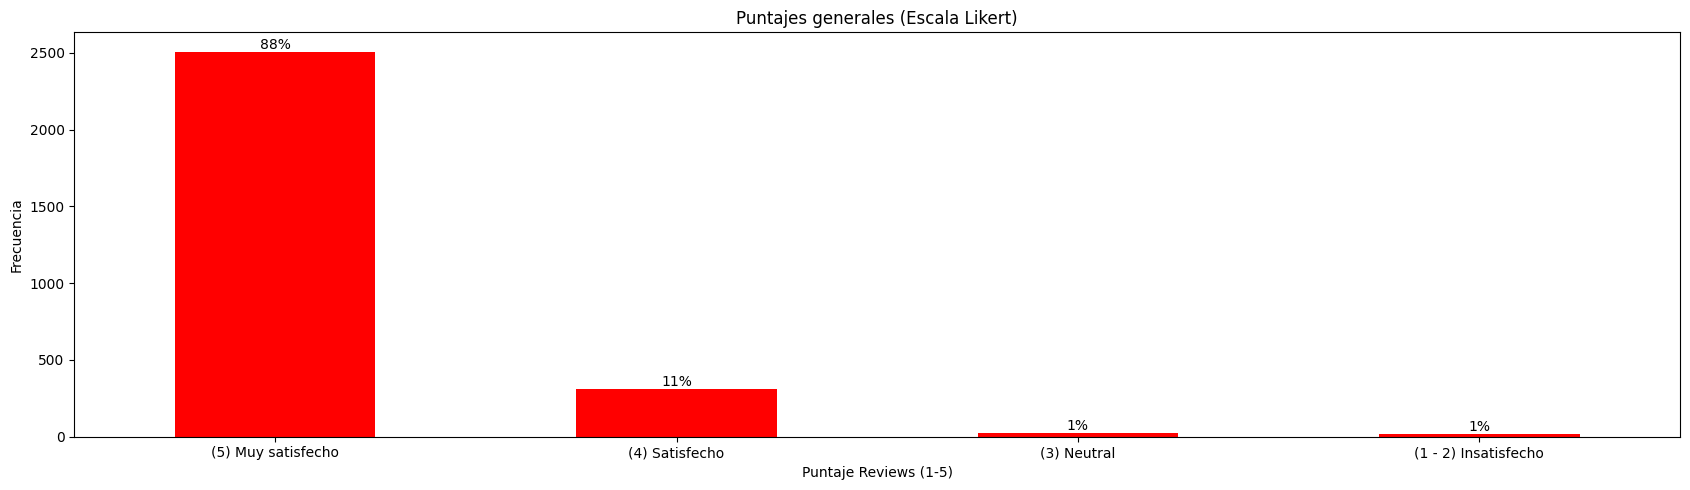

In [197]:
# Obtener el análisis univariado y ajustar el índice
table15 = freq_tbl(df1["reviewScoresCat"]).drop('cumulative_perc', axis=1).set_index('reviewScoresCat')

# Graficar mi frecuencia
ax = table15['frequency'].plot(kind='bar', figsize=(17, 5), color='red', title="Puntajes generales (Escala Likert)", legend=False)
plt.xlabel("Puntaje Reviews (1-5)")
plt.ylabel("Frecuencia")

# Porcentajes
ax.bar_label(ax.containers[0], labels=[f'{p:.0%}' for p in table15['percentage']], label_type='edge', fontsize=10)

# Edición extra
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

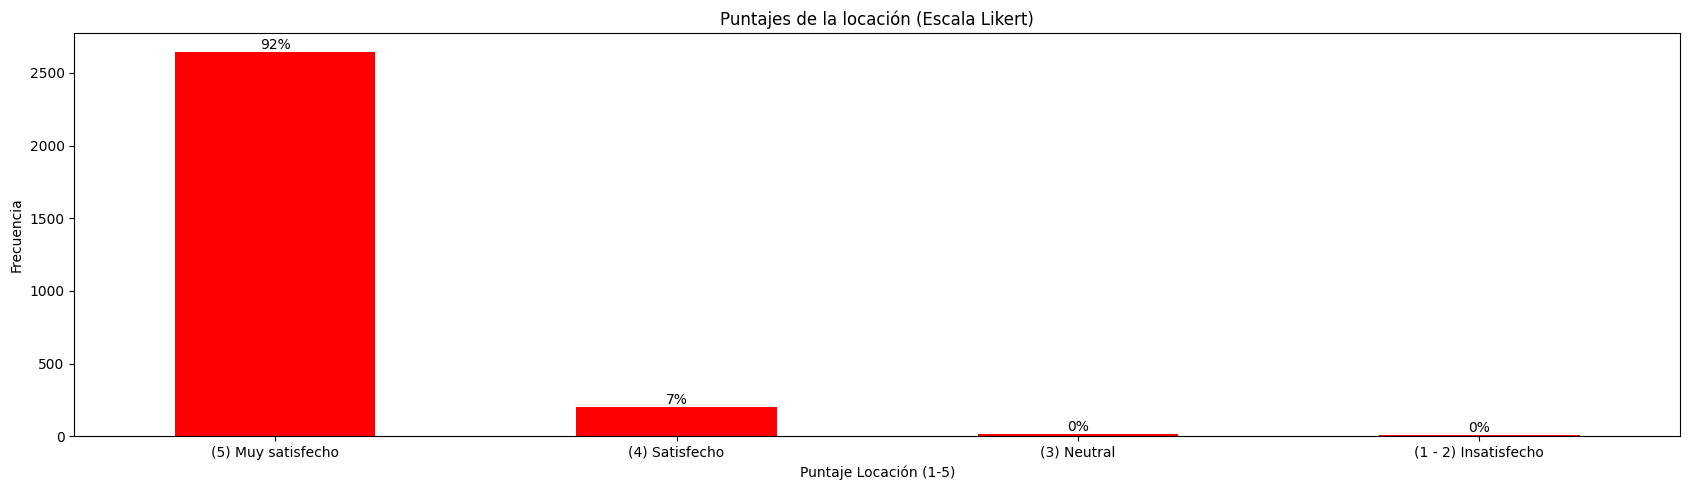

In [186]:
# Obtener el análisis univariado y ajustar el índice
table16 = freq_tbl(df1["reviewLocationCat"]).drop('cumulative_perc', axis=1).set_index('reviewLocationCat')

# Graficar mi frecuencia
ax = table16['frequency'].plot(kind='bar', figsize=(17, 5), color='red', title="Puntajes de la locación (Escala Likert)", legend=False)
plt.xlabel("Puntaje Locación (1-5)")
plt.ylabel("Frecuencia")

# Porcentajes
ax.bar_label(ax.containers[0], labels=[f'{p:.0%}' for p in table16['percentage']], label_type='edge', fontsize=10)

# Edición extra
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

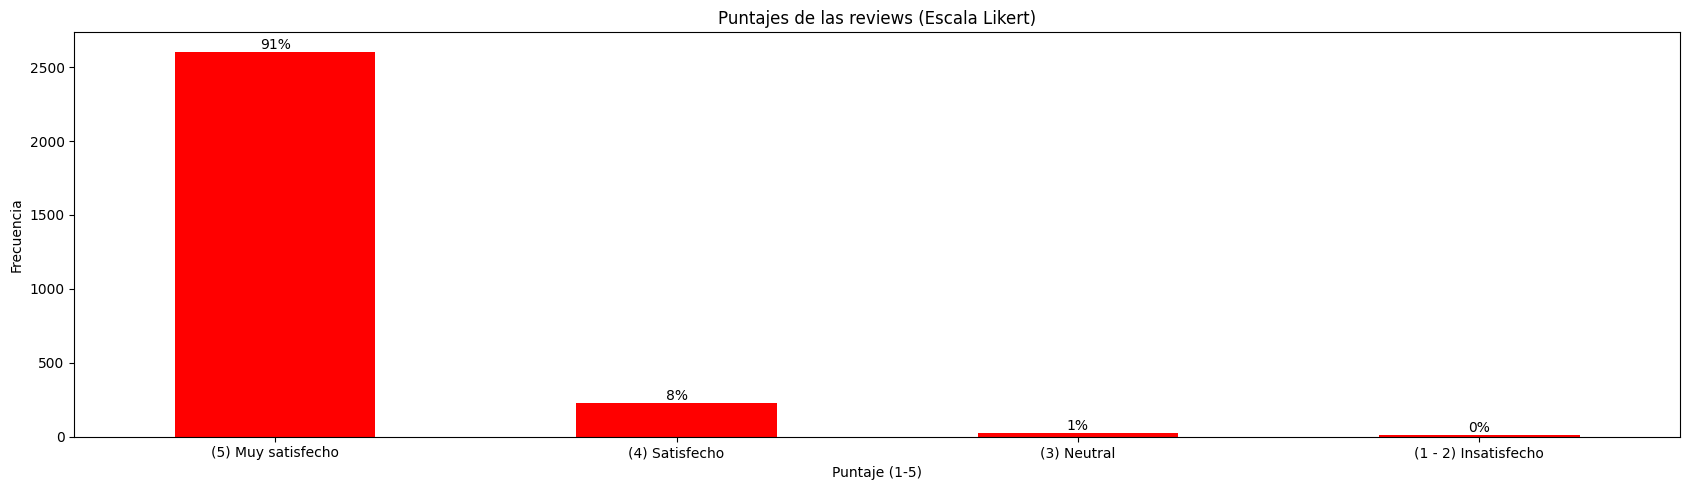

In [196]:
# Obtener el análisis univariado y ajustar el índice
table17 = freq_tbl(df1["reviewRatingCat"]).drop('cumulative_perc', axis=1).set_index('reviewRatingCat')

# Graficar mi frecuencia
ax = table17['frequency'].plot(kind='bar', figsize=(17, 5), color='red', title="Puntajes de las reviews (Escala Likert)", legend=False)
plt.xlabel("Puntaje (1-5)")
plt.ylabel("Frecuencia")

# Porcentajes
ax.bar_label(ax.containers[0], labels=[f'{p:.0%}' for p in table17['percentage']], label_type='edge', fontsize=10)

# Edición extra
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

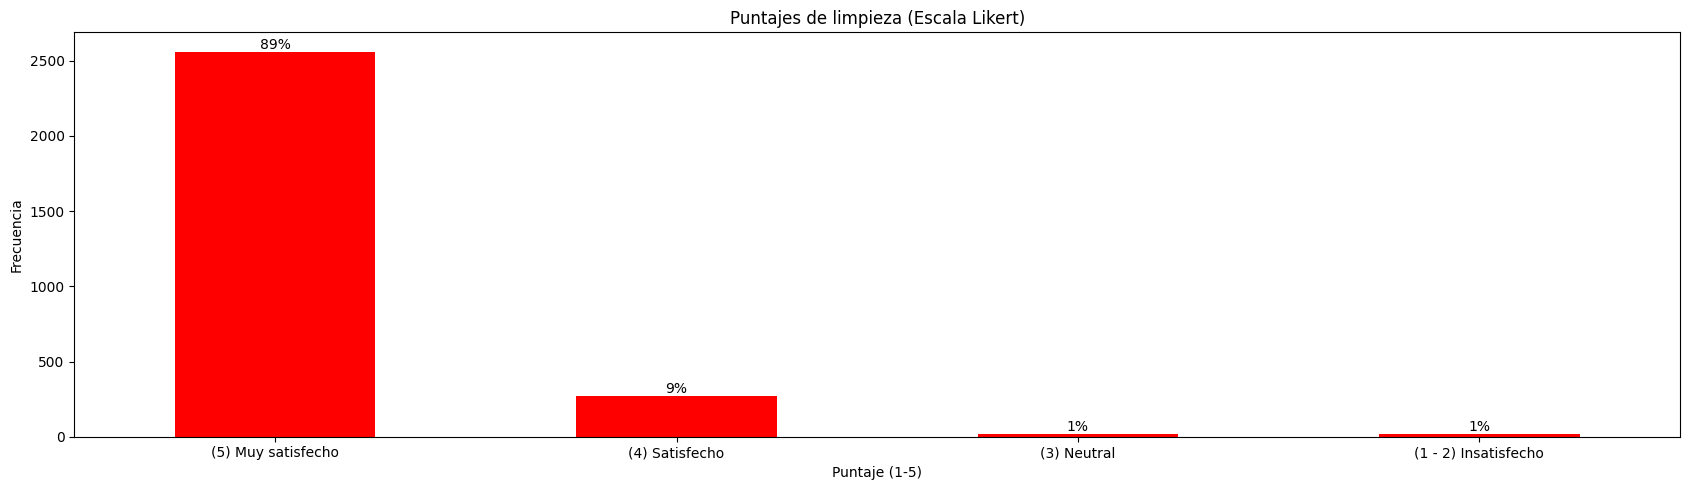

In [188]:
# Obtener el análisis univariado y ajustar el índice
table18 = freq_tbl(df1["reviewCleanCat"]).drop('cumulative_perc', axis=1).set_index('reviewCleanCat')

# Graficar mi frecuencia
ax = table18['frequency'].plot(kind='bar', figsize=(17, 5), color='red', title="Puntajes de limpieza (Escala Likert)", legend=False)
plt.xlabel("Puntaje (1-5)")
plt.ylabel("Frecuencia")

# Porcentajes
ax.bar_label(ax.containers[0], labels=[f'{p:.0%}' for p in table18['percentage']], label_type='edge', fontsize=10)

# Edición extra
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

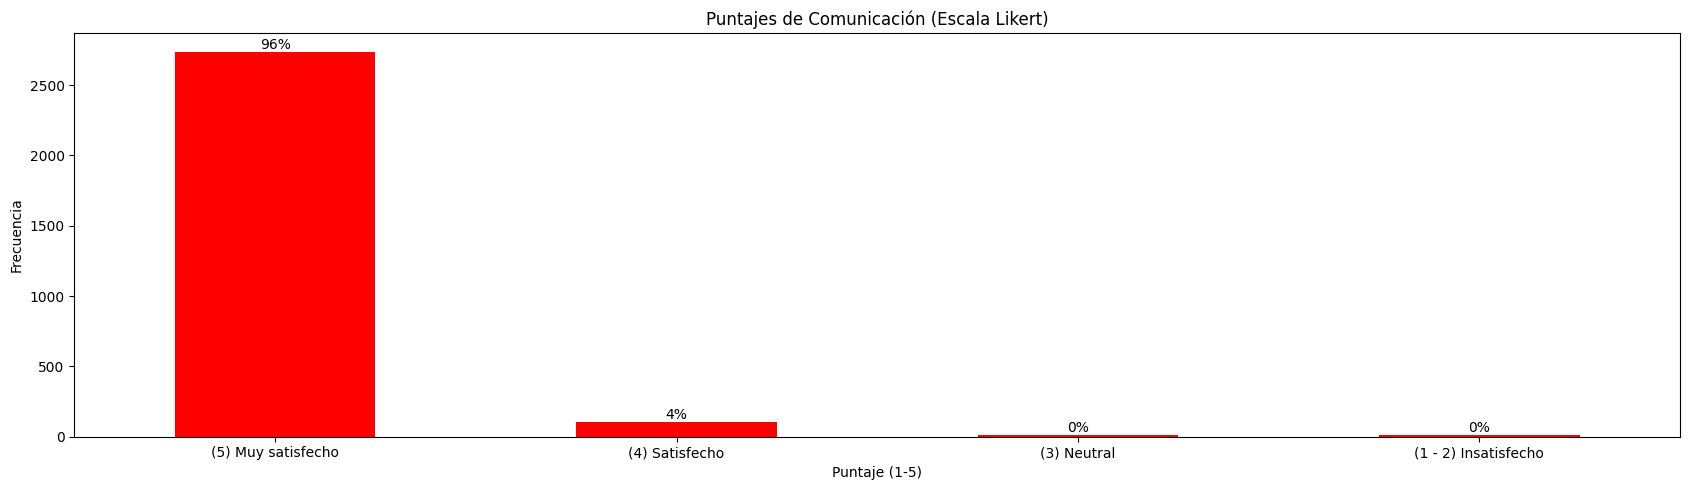

In [189]:
# Obtener el análisis univariado y ajustar el índice
table19 = freq_tbl(df1["reviewCommunicationCat"]).drop('cumulative_perc', axis=1).set_index('reviewCommunicationCat')

# Graficar mi frecuencia
ax = table19['frequency'].plot(kind='bar', figsize=(17, 5), color='red', title="Puntajes de Comunicación (Escala Likert)", legend=False)
plt.xlabel("Puntaje (1-5)")
plt.ylabel("Frecuencia")

# Porcentajes
ax.bar_label(ax.containers[0], labels=[f'{p:.0%}' for p in table19['percentage']], label_type='edge', fontsize=10)

# Edición extra
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

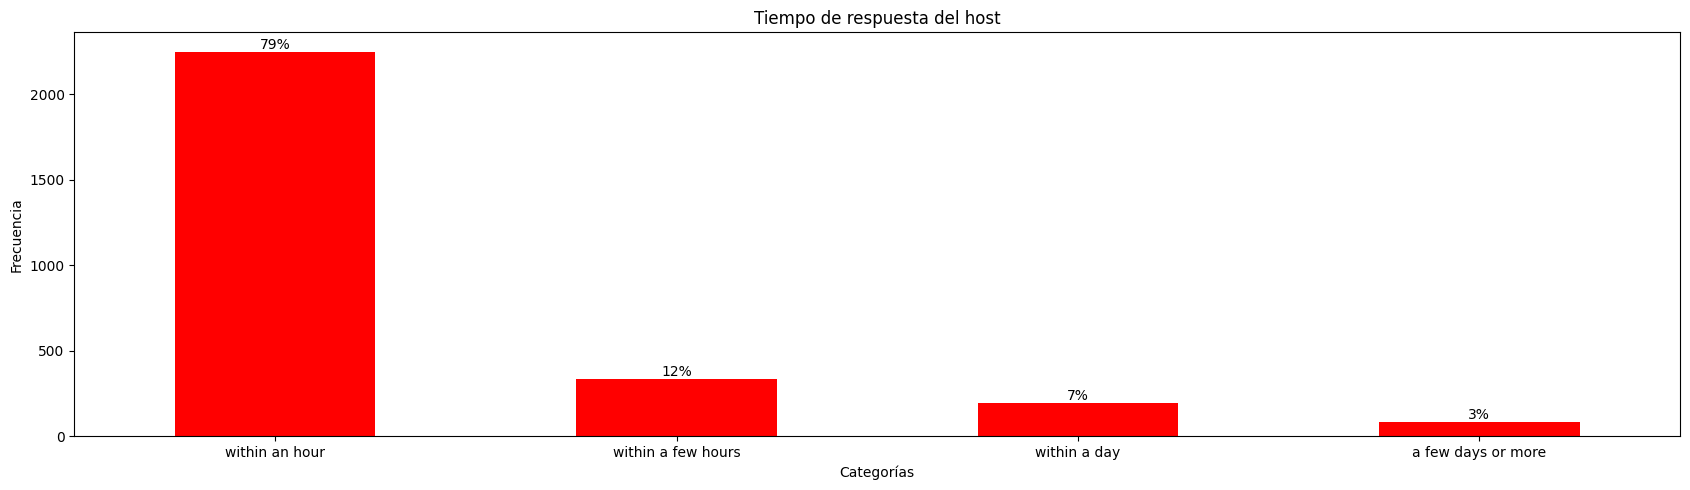

In [190]:
# Obtener el análisis univariado y ajustar el índice
table20 = freq_tbl(df1["host_response_time"]).drop('cumulative_perc', axis=1).set_index('host_response_time')

# Graficar mi frecuencia
ax = table20['frequency'].plot(kind='bar', figsize=(17, 5), color='red', title="Tiempo de respuesta del host", legend=False)
plt.xlabel("Categorías")
plt.ylabel("Frecuencia")

# Porcentajes
ax.bar_label(ax.containers[0], labels=[f'{p:.0%}' for p in table20['percentage']], label_type='edge', fontsize=10)

# Edición extra
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

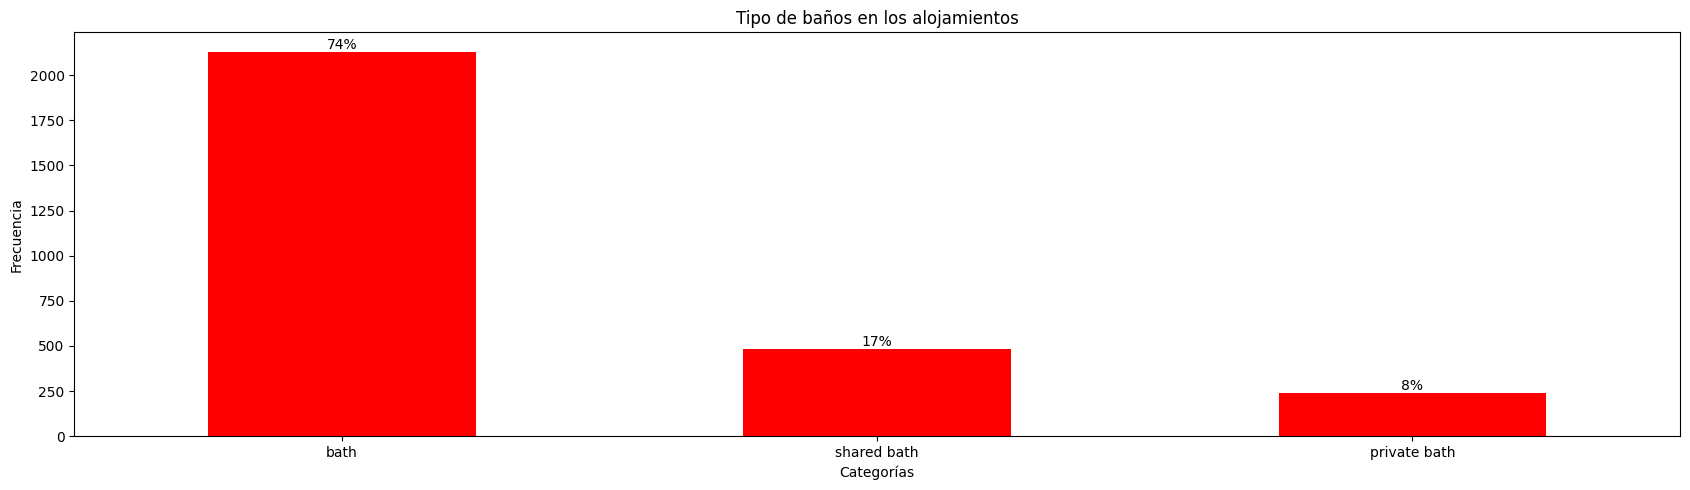

In [191]:
# Obtener el análisis univariado y ajustar el índice
table21 = freq_tbl(df1["bathroom_text_clean"]).drop('cumulative_perc', axis=1).head(3).set_index('bathroom_text_clean')

# Graficar mi frecuencia
ax = table21['frequency'].plot(kind='bar', figsize=(17, 5), color='red', title="Tipo de baños en los alojamientos", legend=False)
plt.xlabel("Categorías")
plt.ylabel("Frecuencia")

# Porcentajes
ax.bar_label(ax.containers[0], labels=[f'{p:.0%}' for p in table21['percentage']], label_type='edge', fontsize=10)

# Edición extra
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

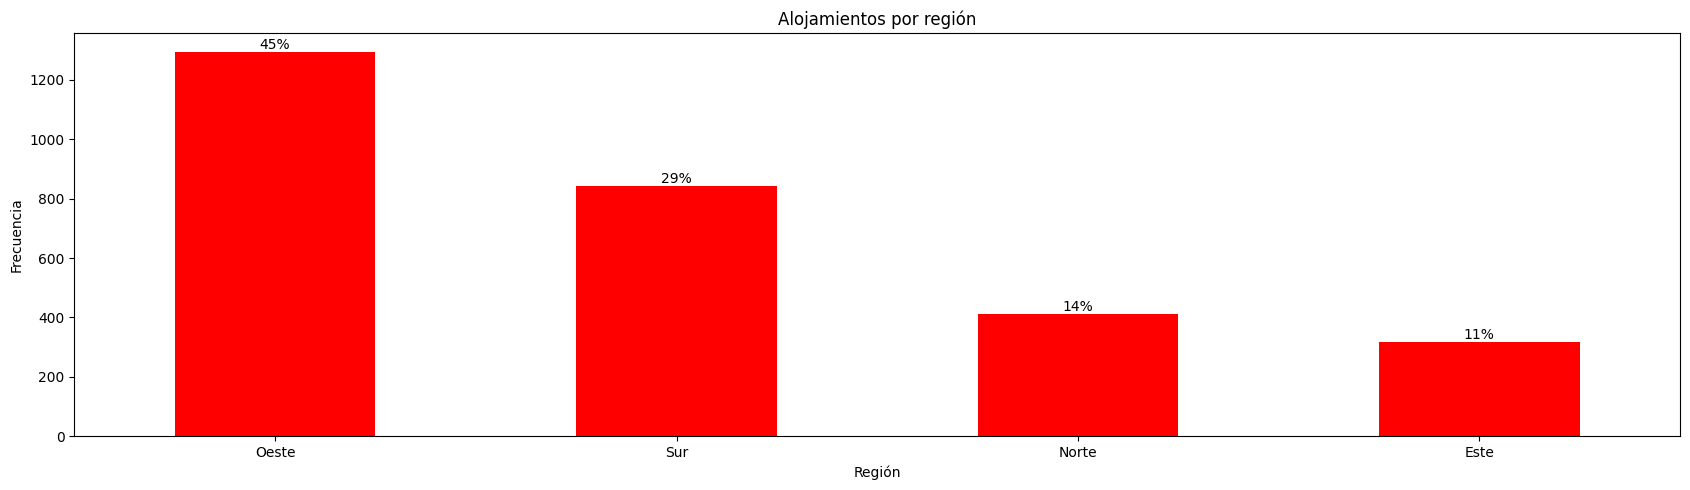

In [192]:
# Obtener el análisis univariado y ajustar el índice
table22 = freq_tbl(df1["neighbourhood_Category"]).drop('cumulative_perc', axis=1).set_index('neighbourhood_Category')

# Graficar mi frecuencia
ax = table22['frequency'].plot(kind='bar', figsize=(17, 5), color='red', title="Alojamientos por región", legend=False)
plt.xlabel("Región")
plt.ylabel("Frecuencia")

# Porcentajes
ax.bar_label(ax.containers[0], labels=[f'{p:.0%}' for p in table22['percentage']], label_type='edge', fontsize=10)

# Edición extra
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

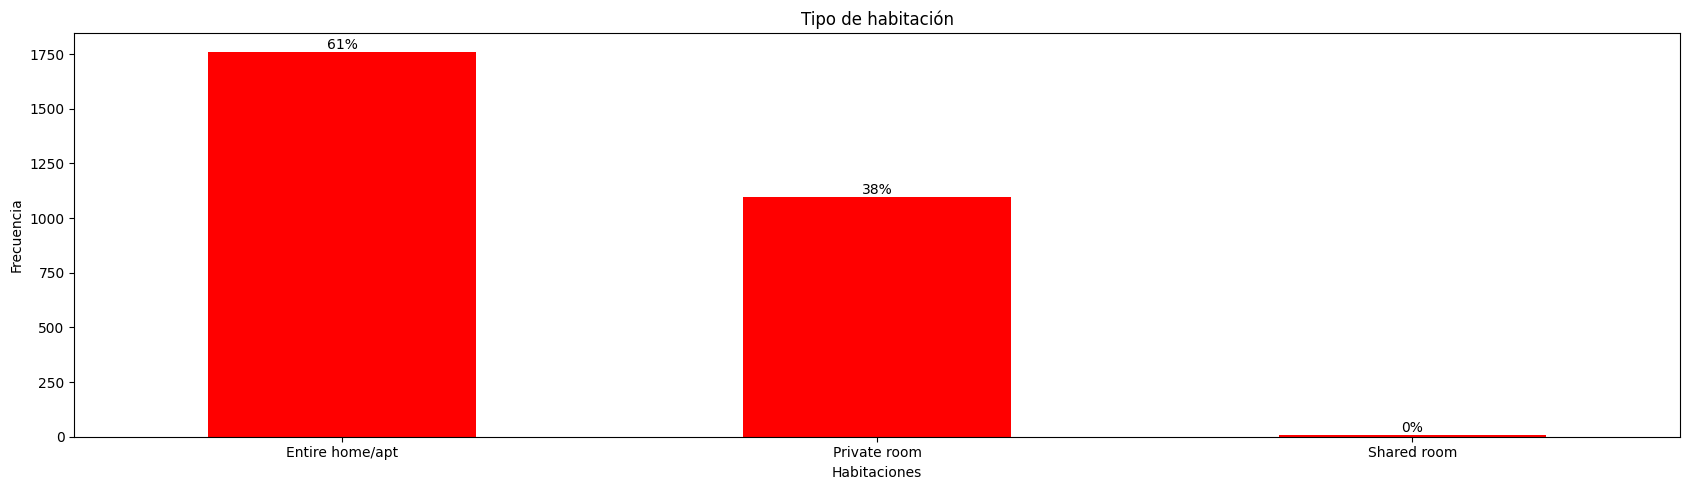

In [195]:
# Obtener el análisis univariado y ajustar el índice
table23 = freq_tbl(df1["room_type"]).drop('cumulative_perc', axis=1).set_index('room_type')

# Graficar mi frecuencia
ax = table23['frequency'].plot(kind='bar', figsize=(17, 5), color='red', title="Tipo de habitación", legend=False)
plt.xlabel("Habitaciones")
plt.ylabel("Frecuencia")

# Porcentajes
ax.bar_label(ax.containers[0], labels=[f'{p:.0%}' for p in table23['percentage']], label_type='edge', fontsize=10)

# Edición extra
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()